Imagina que quires predecir el precio de una casa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({
    'house_size': [2104, 1460, 1534, 852, 1200, 1800, 1000, 1700, 1900, 1500, 1000],
    'price_1000s': [460, 232, 315, 178, 400, 300, 350, 250, 400, 250, 250]
})

/Users/antoniomanguart/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


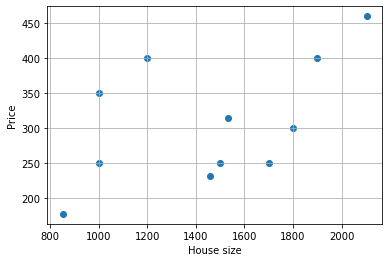

In [2]:
plt.scatter(df.house_size, df.price_1000s)
plt.xlabel("House size")
plt.ylabel("Price")
plt.grid()

### Repasando el concepto de pendiente

Al jugar con la ecuación lineal de $y = b + mx$ donde :

$b$ = el intercepto

$m$ = pendiente

Visualizamos distintos tipos de pendiente

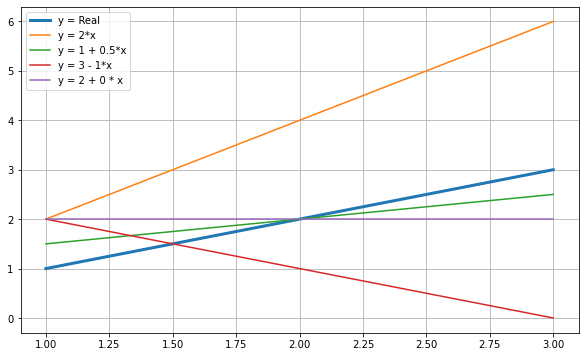

In [31]:
x = np.array([1,2,3])
y = np.array([1,2,3])

plt.figure(figsize=(10,6))
plt.plot(x, 1*x, label="y = Real", linewidth=3)
plt.plot(x, 2*x, label="y = 2*x")
plt.plot(x, 1 + 0.5*x, label="y = 1 + 0.5*x")
plt.plot(x, 3 - 1*x, label="y = 3 - 1*x")
plt.plot(x, 2 + 0*x, label="y = 2 + 0 * x")

plt.grid()
plt.legend(loc='best')

### Adaptando el concepto de pendiente

Podemos asumir que la relación es lineal 

Vamos a asumir que la relación entre el tamaño de la casa y el precio es *lineal* 

$precio = \theta_0 + \theta_1 x_1 $

Donde $x_1$ es el tamaño de la casa, el objetivo es obteber aquellas $\theta$ que predice mejor.

Por convención en el lingo de machine learning llamamos a la predicción *hipotesis*

$h_\theta(x) = \theta_0 + \theta_1 x_1$

La forma en que medimos que tan buen modelo es calculando el error

Vamos a minimizar el *error cuadrático medio*, esto lo conocemos como *función de costo* 

$J(\theta_0, \theta_1) = \frac {1}{2m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)})^2$


#### Intuición función de costo

$h_\theta(x) = \theta_0 + \theta_1 x$

$h_\theta(x) = 1 + \theta* x$

Vamos a dejar fija $\theta$



In [4]:
posibles_theta = np.array([-3, -2, -1, 0, 1, 2, 3,4])

In [5]:
errors = [1/(2*len(x)) * np.sum((1 + i*x - y)**2) for i in posibles_theta]

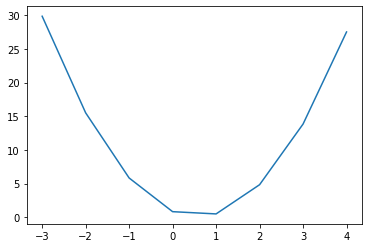

In [6]:
plt.plot(posibles_theta, errors)

**La relación entre $\theta$ y la función de perdida es cuadrática**

En este caso, la mejor $\theta$ se encuentra entre 0 y 1

Para el caso de dos variables $\theta$ tendríamos una función en 3D que se viera así:

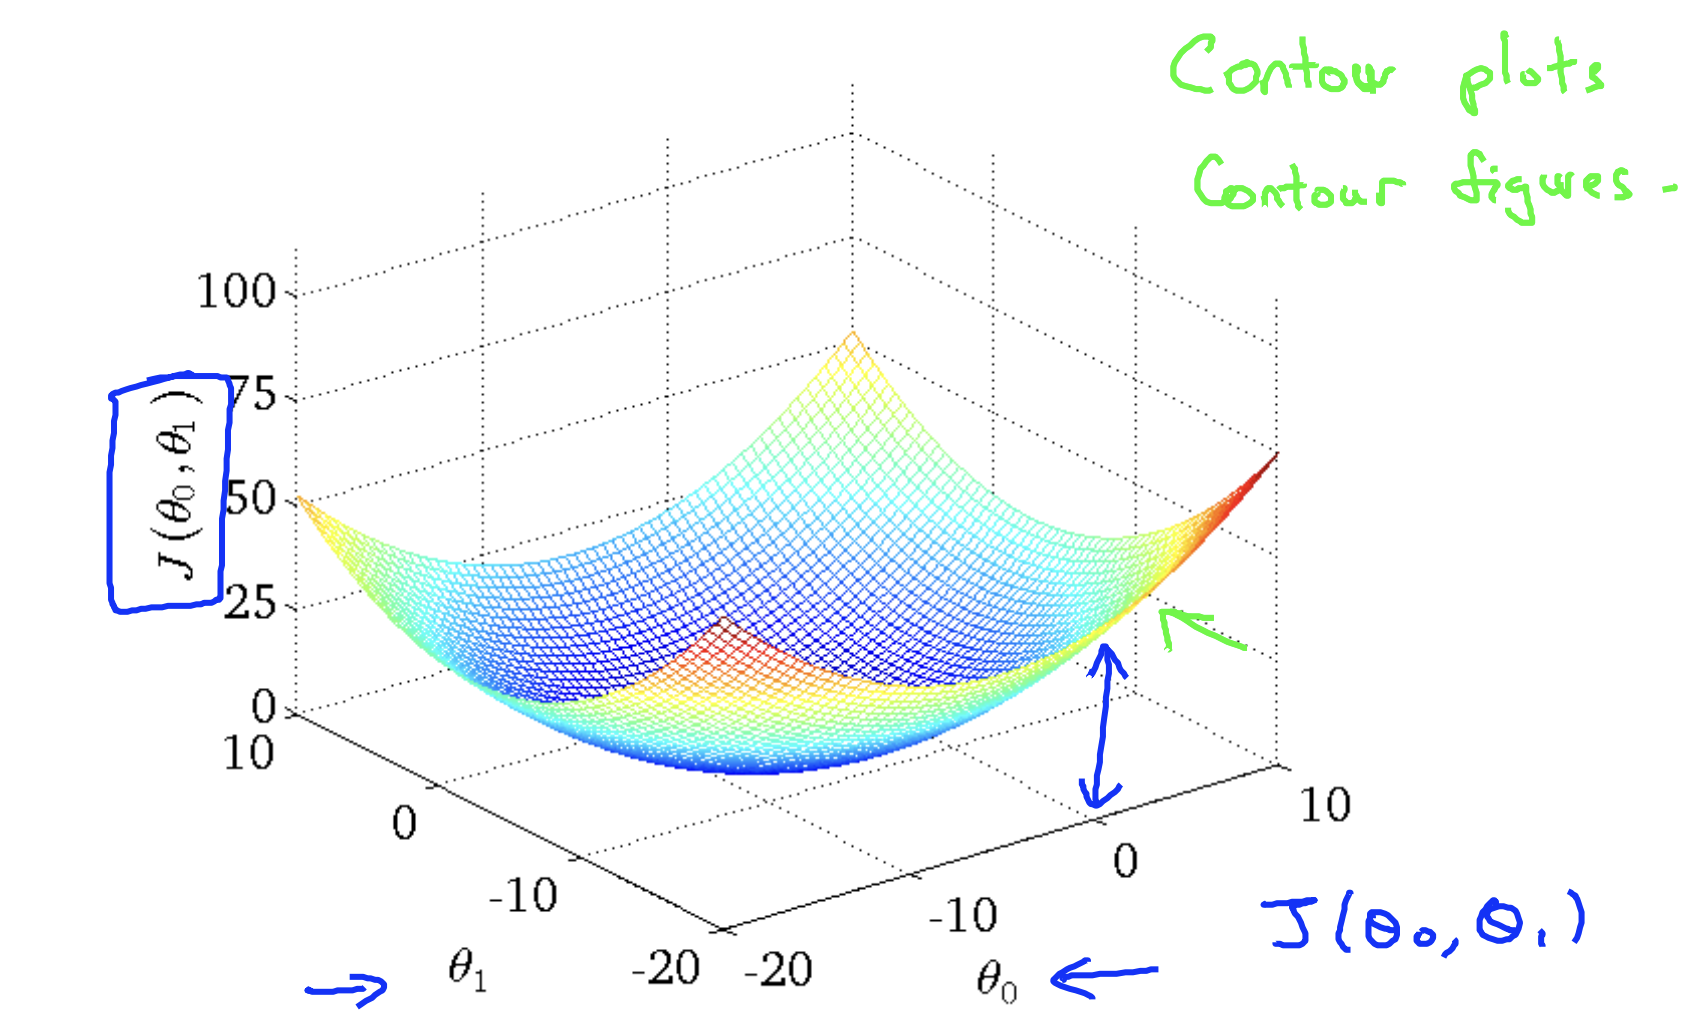

In [7]:
from IPython.display import Image
Image(filename='3d.png')

Viendo las dos imagenes, en ambos casos existe un claro mínimo.

¿Cómo encontramos ese mínimo?

Respuesta: utilizaremos decenso en gradiente 

_Repite hasta converger_ {

$\theta_j := \theta_j - \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$


}


En este caso tenemos dos variables y es:

_Repite hasta converger_ {

$\theta_0 := \theta_0 - \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

$\theta_1 := \theta_1 - \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$

}

### Intuición

Ejemplo: encuentra el míniomo de la función cuadrática 

$w^2 + 3w + 4$

Derivada:

$2w + 3$

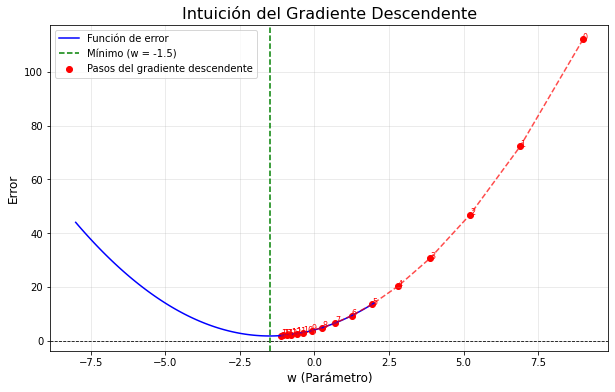

In [8]:
# Paso 1: Definir la función de error (una parábola)
def error_function(w):
    return w**2 + 3*w + 4  # Ejemplo: Una función cuadrática

# Derivada de la función de error (el gradiente)
def gradient(w):
    return 2*w + 3

# Paso 2: Parámetros iniciales
w_start = 9  # Valor inicial de w
learning_rate = 0.1  # Tasa de aprendizaje
n_iterations = 15  # Número de iteraciones

# Almacenamos los valores de w y el error para visualizar
w_values = [w_start]
error_values = [error_function(w_start)]

# Gradiente descendente iterativo
w = w_start
for i in range(n_iterations):
    grad = gradient(w)  # Calculamos el gradiente
    w = w - learning_rate * grad  # Actualizamos w
    w_values.append(w)  # Guardamos el nuevo valor de w
    error_values.append(error_function(w))  # Guardamos el nuevo error

# Paso 3: Visualizar la función y los pasos del gradiente descendente
# Creamos un rango de valores para w y calculamos los errores
w_range = np.linspace(-8, 2, 100)
errors = error_function(w_range)

plt.figure(figsize=(10, 6))
plt.plot(w_range, errors, label="Función de error", color="blue")
plt.scatter(w_values, error_values, color="red", label="Pasos del gradiente descendente")
plt.plot(w_values, error_values, color="red", linestyle="--", alpha=0.7)

# Resaltar los puntos importantes
for i, (w, e) in enumerate(zip(w_values, error_values)):
    plt.text(w, e, f"{i}", fontsize=8, color="red")

# Personalizar el gráfico
plt.title("Intuición del Gradiente Descendente", fontsize=16)
plt.xlabel("w (Parámetro)", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(-1.5, color="green", linestyle="--", label="Mínimo (w = -1.5)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Aplicandolo  

_Repite hasta converger_ {

$\theta_0 := \theta_0 - \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

$\theta_1 := \theta_1 - \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$

}

$\theta_j - \frac{\partial}{\partial \theta_j} \frac {1}{2m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)})^2$

Esto es igua a:


$\theta_j - \frac{\partial}{\partial \theta_j} \frac {1}{2m} \Sigma_{i=1}^{m} (\theta_0 + \theta_1 x_1^{(i)} - y^{(i)})^2$


Para obtener la derivada

$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = 2 * \frac{1}{2m} * (\theta_0 + \theta_1 x_1^{(i)} - y^{(i)}) * \frac{\partial}{\partial \theta_j} (\theta_0 + \theta_1 x_1^{(i)} - y^{(i)})$


En el caso de $j=0$ (es decir, en el caso de $\theta_0$) la derivada queda : 

$\frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) $


En el caso de $j=1$ (es decir, en el caso de $\theta_1$) la derivada queda : 

$\frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) * x_1^{(i)} $


### Ya con todo lo anterior, pasamos de esto:


_Repite hasta converger_ {

$\theta_0 := \theta_0 - \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

$\theta_1 := \theta_1 - \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$

}

### A esto:


_Repite hasta converger_ {


$\theta_0 := \theta_0 - \frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) $

$\theta_1 := \theta_1 - \frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) * x_1^{(i)} $


}


Parámetros finales: w = 42.546, b = 305.705
Función ajustada: y = 42.546x + 305.705


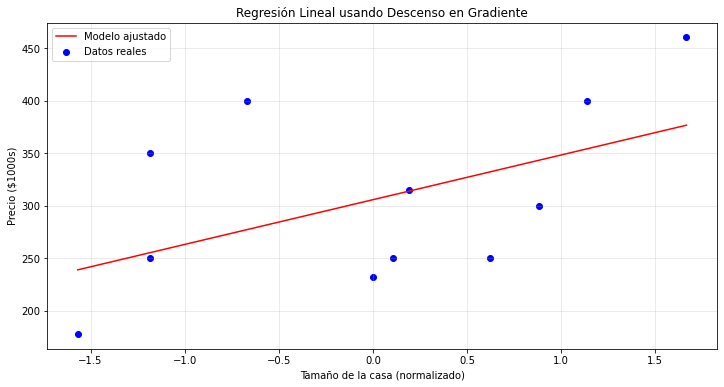

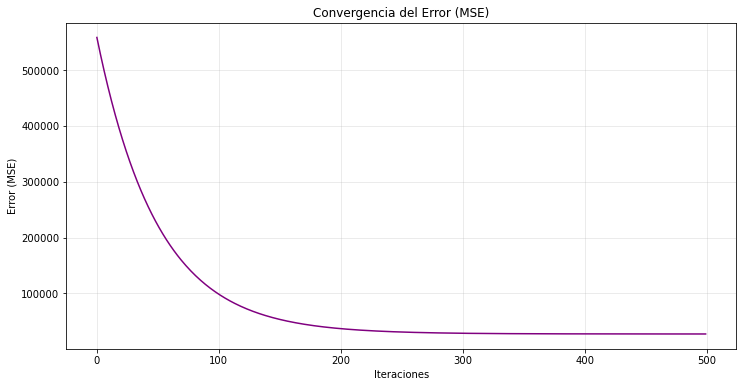

In [11]:
df = pd.DataFrame({
    'house_size': [2104, 1460, 1534, 852, 1200, 1800, 1000, 1700, 1900, 1500, 1000],
    'price_1000s': [460, 232, 315, 178, 400, 300, 350, 250, 400, 250, 250]
})
# Variables independientes y dependientes
X = np.array(df['house_size'], dtype=np.float64)
y = np.array(df['price_1000s'], dtype=np.float64)

# Normalización de los datos para acelerar la convergencia
X = (X - X.mean()) / X.std()

# Inicialización de parámetros
w = 0.0  # Pendiente
b = 0.0  # Intercepto
learning_rate = 0.01
n_iterations = 500
n = len(X)

# Almacenar el historial de pérdidas para visualizar la convergencia
loss_history = []

# Gradiente descendente
for _ in range(n_iterations):
    # Predicciones
    y_pred = w * X + b
    
    # Cálculo del error (MSE)
    loss = (1/2) * np.sum((y - y_pred)**2)
    loss_history.append(loss)
    
    # Gradientes
    grad_w = -(1/n) * np.sum(X * (y - y_pred))
    grad_b = -(1/n) * np.sum(y - y_pred)
    
    # Actualización de parámetros
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b

# Resultados finales
print(f"Parámetros finales: w = {w:.3f}, b = {b:.3f}")
print(f"Función ajustada: y = {w:.3f}x + {b:.3f}")

# Gráfico de los resultados
plt.figure(figsize=(12, 6))

# Gráfico de los datos
plt.scatter(X, y, label="Datos reales", color="blue")

# Gráfico de la regresión
x_line = np.linspace(X.min(), X.max(), 100)
y_line = w * x_line + b
plt.plot(x_line, y_line, color="red", label="Modelo ajustado")

plt.title("Regresión Lineal usando Descenso en Gradiente")
plt.xlabel("Tamaño de la casa (normalizado)")
plt.ylabel("Precio ($1000s)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Gráfico de la pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss_history, color="purple")
plt.title("Convergencia del Error (MSE)")
plt.xlabel("Iteraciones")
plt.ylabel("Error (MSE)")
plt.grid(alpha=0.3)
plt.show()

## Imaginate que ahora tenemo dos variables, tamaño y habitaciones 

In [12]:
# Datos iniciales
df = pd.DataFrame({
    'house_size': [2104, 1460, 1534, 852, 1200, 1800, 1000, 1700, 1900, 1500, 1000],
    'num_rooms': [3, 2, 3, 1, 2, 4, 2, 3, 3, 2, 2],  # Nueva variable inventada
    'price_1000s': [460, 232, 315, 178, 400, 300, 350, 250, 400, 250, 250]
})


El algoritmo es realmente el mismo ya que sigue siendo una función cuadrática, por definición las funciones cuadráticas tienen un mínimo:

_Repite hasta converger_ {

$\theta_j := \theta_j - \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$

}

Si son dos variables : 

_Repite hasta converger_ {

$\theta_0 := \theta_0 - \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1, \theta_2)$

$\theta_1 := \theta_1 - \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1, \theta_2)$

$\theta_2 := \theta_2 - \frac{\partial}{\partial \theta_2} J(\theta_0, \theta_1, \theta_2)$

}

Para obtener la derivada es lo mismo:

$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1, \theta_2) = 2 * \frac{1}{2m} * (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} - y^{(i)}) * \frac{\partial}{\partial \theta_j} (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} - y^{(i)})$


En el caso de $j=0$ (es decir, en el caso de $\theta_0$) la derivada queda : 

$\frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) $


En el caso de $j=1$ (es decir, en el caso de $\theta_1$) la derivada queda : 

$\frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) * x_1^{(i)} $

En el caso de $j=2$ (es decir, en el caso de $\theta_2$) la derivada queda : 

$\frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) * x_2^{(i)} $

Generalizando, para todas las $j$ que nosean $j=0$ la derivada es :

$\frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) * x_j^{(i)} $


## Por lo tanto, generalizando:


Donde 


$h_{\theta} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

_Repite hasta converger_ {


$\theta_0 := \theta_0 - \frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) $

_para todo $j$ distinto de  $0$_

$\theta_j := \theta_1 - \frac{1}{m} \Sigma_{i=1}^{m} (h_{\theta}(x^{(i)})) - y^{(i)}) * x_j^{(i)} $


}

Con lo anterior tenemos nuestro primer algoritmo de machine learning generalizado y se le conoce como regresión lineal múltiple

### Veamos el ejemplo anterior pero con dos variables


Parámetros finales:
w1 (house_size) = 32.977
w2 (num_rooms)  = 10.538
b (intercepto)  = 305.705
Función ajustada: y = 32.977 * house_size + 10.538 * num_rooms + 305.705


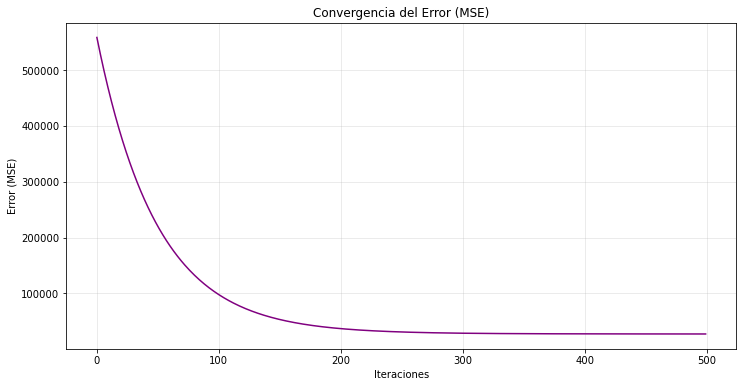

In [33]:
# Variables independientes (X) y dependientes (y)
house_size = np.array(df['house_size'], dtype=np.float64)
num_rooms = np.array(df['num_rooms'], dtype=np.float64)
y = np.array(df['price_1000s'], dtype=np.float64)

# Normalización de los datos (para ambas variables independientes)
house_size = (house_size - house_size.mean()) / house_size.std()
num_rooms = (num_rooms - num_rooms.mean()) / num_rooms.std()

# Inicialización de parámetros
w1 = 0.0  # Coeficiente para house_size
w2 = 0.0  # Coeficiente para num_rooms
b = 0.0   # Intercepto
learning_rate = 0.01
n_iterations = 500
n = len(y)

# Almacenar el historial de pérdidas para visualizar la convergencia
loss_history = []

# Gradiente descendente
for _ in range(n_iterations):
    # Predicciones
    y_pred = w1 * house_size + w2 * num_rooms + b
    
    # Cálculo del error (MSE)
    loss = 1/2 * np.sum((y - y_pred)**2)
    loss_history.append(loss)
    
    # Gradientes
    grad_w1 = -(1/n) * np.sum(house_size * (y - y_pred))  # Gradiente respecto a w1
    grad_w2 = -(1/n) * np.sum(num_rooms * (y - y_pred))   # Gradiente respecto a w2
    grad_b = -(1/n) * np.sum(y - y_pred)                 # Gradiente respecto a b
    
    # Actualización de parámetros
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b -= learning_rate * grad_b

# Resultados finales
print(f"Parámetros finales:")
print(f"w1 (house_size) = {w1:.3f}")
print(f"w2 (num_rooms)  = {w2:.3f}")
print(f"b (intercepto)  = {b:.3f}")
print(f"Función ajustada: y = {w1:.3f} * house_size + {w2:.3f} * num_rooms + {b:.3f}")

# Gráfico de la pérdida
plt.figure(figsize=(12, 6))
plt.plot(loss_history, color="purple")
plt.title("Convergencia del Error (MSE)")
plt.xlabel("Iteraciones")
plt.ylabel("Error (MSE)")
plt.grid(alpha=0.3)
plt.show()
